## Hypothesis 3: Warmer regions have lesser number of COVID-19 cases


### Comparing cases country-wise

In [37]:
%matplotlib inline
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt


In [38]:
new_cases = 'Data/new_cases.csv'
total_cases = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/ecdc/total_cases_per_million.csv'

In [39]:
def get_newcases(csv_file):
    
    """Given a filename which has a comma separated (.csv) filetype,return a N dimensional 
    array (numpy.ndarray).
    
    We load the file as a pandas dataframe having no headers and load only the relevant columns 
    needed for analysis.
    
    :param csv_file: The csv file to load
    :return: a N dimensional array (numpy.ndarray)
    """
    data_file = pd.read_csv(csv_file,usecols=['date','United States','United Kingdom','Italy','Spain','Canada','Australia','Brazil','Chile','South Africa','New Zealand']) # Importing only necessary columns from the dataset
    return data_file


In [40]:
covid_cases = get_newcases(new_cases)
covid_cases 

,date,Australia,Brazil,Canada,Chile,Italy,New Zealand,South Africa,Spain,United Kingdom,United States
0,2019-12-31,0,0,0,NaN,0,0.0,NaN,0.0,0,0
1,2020-01-01,0,0,0,NaN,0,0.0,NaN,0.0,0,0
2,2020-01-02,0,0,0,NaN,0,0.0,NaN,0.0,0,0
3,2020-01-03,0,0,0,NaN,0,0.0,NaN,0.0,0,0
4,2020-01-04,0,0,0,NaN,0,0.0,NaN,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
122,2020-05-01,16,7218,1649,1138.0,1872,3.0,297.0,1781.0,6032,29917
123,2020-05-02,5,6209,1825,985.0,1965,2.0,304.0,1366.0,6201,33955
124,2020-05-03,16,4970,1653,1427.0,1900,2.0,385.0,884.0,4806,29288
125,2020-05-04,18,4588,2760,1228.0,1389,1.0,447.0,NaN,4339,24972


In [41]:
#Data cleaning and profiling
covid_cases.rename({'date': 'Date'}, axis=1, inplace=True) #renaming columns
covid_cases['Date'] =  pd.to_datetime(covid_cases['Date']) #checking data types
covid_cases.dtypes

Date              datetime64[ns]
Australia                  int64
Brazil                     int64
Canada                     int64
Chile                    float64
Italy                      int64
New Zealand              float64
South Africa             float64
Spain                    float64
United Kingdom             int64
United States              int64
dtype: object

In [42]:
covid_cases

,Date,Australia,Brazil,Canada,Chile,Italy,New Zealand,South Africa,Spain,United Kingdom,United States
0,2019-12-31,0,0,0,NaN,0,0.0,NaN,0.0,0,0
1,2020-01-01,0,0,0,NaN,0,0.0,NaN,0.0,0,0
2,2020-01-02,0,0,0,NaN,0,0.0,NaN,0.0,0,0
3,2020-01-03,0,0,0,NaN,0,0.0,NaN,0.0,0,0
4,2020-01-04,0,0,0,NaN,0,0.0,NaN,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
122,2020-05-01,16,7218,1649,1138.0,1872,3.0,297.0,1781.0,6032,29917
123,2020-05-02,5,6209,1825,985.0,1965,2.0,304.0,1366.0,6201,33955
124,2020-05-03,16,4970,1653,1427.0,1900,2.0,385.0,884.0,4806,29288
125,2020-05-04,18,4588,2760,1228.0,1389,1.0,447.0,NaN,4339,24972


In [43]:
#(covid_cases.Australia.values='1').argmax()
#covid_cases.Australia.ne('1').idxmax() #output is 0
#covid_cases[covid_cases['Australia']='1'].first_valid_index()
#x

In [44]:
def get_totalcases_cold(csv_file):
    
    """Given a filename which has a comma separated (.csv) filetype,return a N dimensional 
    array (numpy.ndarray) of colder countries
    
    We load the file as a pandas dataframe having no headers and load only the relevant columns 
    needed for analysis.
    
    :param csv_file: The csv file to load
    :return: a N dimensional array (numpy.ndarray)
    """
    data_file = pd.read_csv(csv_file,usecols=['date','United States','United Kingdom','Italy','Spain','Canada']) # Importing only necessary columns from the dataset
    return data_file

In [45]:
#Colder Regions
colder_country_cases = get_totalcases_cold(total_cases)
colder_country_cases

,date,Canada,Italy,Spain,United Kingdom,United States
0,2019-12-31,0.000,0.000,0.000,0.000,0.000
1,2020-01-01,0.000,0.000,0.000,0.000,0.000
2,2020-01-02,0.000,0.000,0.000,0.000,0.000
3,2020-01-03,0.000,0.000,0.000,0.000,0.000
4,2020-01-04,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...
123,2020-05-02,1458.873,3430.727,4632.296,2614.000,3334.659
124,2020-05-03,1502.670,3462.151,4651.203,2684.795,3423.142
125,2020-05-04,1575.798,3485.125,NaN,2748.711,3498.585
126,2020-05-05,1610.189,3505.319,4662.860,2807.412,3566.842


In [46]:
colder_country_cases.isna().sum()

date              0
Canada            0
Italy             0
Spain             1
United Kingdom    0
United States     0
dtype: int64

In [47]:
colder_country_cases['Spain'] = colder_country_cases['Spain'].fillna('0') #replace null values with zero
colder_country_cases.rename({'date': 'Date'}, axis=1, inplace=True)
colder_country_cases = colder_country_cases[colder_country_cases['Date'] > '2019-12-31']
colder_country_cases

,Date,Canada,Italy,Spain,United Kingdom,United States
1,2020-01-01,0.000,0.000,0,0.000,0.000
2,2020-01-02,0.000,0.000,0,0.000,0.000
3,2020-01-03,0.000,0.000,0,0.000,0.000
4,2020-01-04,0.000,0.000,0,0.000,0.000
5,2020-01-05,0.000,0.000,0,0.000,0.000
...,...,...,...,...,...,...
123,2020-05-02,1458.873,3430.727,4632.3,2614.000,3334.659
124,2020-05-03,1502.670,3462.151,4651.2,2684.795,3423.142
125,2020-05-04,1575.798,3485.125,0,2748.711,3498.585
126,2020-05-05,1610.189,3505.319,4662.86,2807.412,3566.842


In [48]:
#colder_country_cases['Date'] =  pd.to_datetime(colder_country_cases['Date'])
colder_country_cases['Date'] = pd.to_datetime(colder_country_cases['Date'])
colder_country_cases["Spain"] = colder_country_cases["Spain"].astype(str).astype(float)
colder_country_cases.dtypes

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Date              datetime64[ns]
Canada                   float64
Italy                    float64
Spain                    float64
United Kingdom           float64
United States            float64
dtype: object

In [49]:
def get_totalcases_hot(csv_file):
    
    """Given a filename which has a comma separated (.csv) filetype,return a N dimensional 
    array (numpy.ndarray).
    
    We load the file as a pandas dataframe having no headers and load only the relevant columns 
    needed for analysis.
    
    :param csv_file: The csv file to load
    :return: a N dimensional array (numpy.ndarray)
    """
    data_file = pd.read_csv(csv_file,usecols=['date','Australia','Brazil','Chile','South Africa','New Zealand']) # Importing only necessary columns from the dataset
    return data_file

In [50]:
warmer_country_cases = get_totalcases_hot(total_cases)
warmer_country_cases

,date,Australia,Brazil,Chile,New Zealand,South Africa
0,2019-12-31,0.000,0.000,NaN,0.000,NaN
1,2020-01-01,0.000,0.000,NaN,0.000,NaN
2,2020-01-02,0.000,0.000,NaN,0.000,NaN
3,2020-01-03,0.000,0.000,NaN,0.000,NaN
4,2020-01-04,0.000,0.000,NaN,0.000,NaN
...,...,...,...,...,...,...
123,2020-05-02,265.374,430.887,889.716,235.161,100.339
124,2020-05-03,266.001,454.268,964.365,235.576,106.831
125,2020-05-04,266.707,475.853,1028.604,235.783,114.368
126,2020-05-05,267.648,507.058,1079.869,235.783,121.736


In [51]:
warmer_country_cases.isna().sum()

date             0
Australia        0
Brazil           0
Chile           65
New Zealand      9
South Africa    68
dtype: int64

In [27]:
#Data Cleaning and Profiling
warmer_country_cases['Chile']=warmer_country_cases['Chile'].fillna('0')
warmer_country_cases['New Zealand']=warmer_country_cases['New Zealand'].fillna('0')
warmer_country_cases['South Africa']=warmer_country_cases['South Africa'].fillna('0')
warmer_country_cases.rename({'date': 'Date'}, axis=1, inplace=True)
warmer_country_cases = warmer_country_cases[warmer_country_cases['Date'] > '2019-12-31']
#warmer_country_cases["Mean"]=warmer_country_cases['Australia'].mean(axis=0)
#df = df.assign(mean=df.mean(axis=1))
warmer_country_cases

,Date,Australia,Brazil,Chile,New Zealand,South Africa
1,2020-01-01,0.000,0.000,0,0,0
2,2020-01-02,0.000,0.000,0,0,0
3,2020-01-03,0.000,0.000,0,0,0
4,2020-01-04,0.000,0.000,0,0,0
5,2020-01-05,0.000,0.000,0,0,0
...,...,...,...,...,...,...
123,2020-05-02,265.374,430.887,889.716,235.161,100.339
124,2020-05-03,266.001,454.268,964.365,235.576,106.831
125,2020-05-04,266.707,475.853,1028.6,235.783,114.368
126,2020-05-05,267.648,507.058,1079.87,235.783,121.736


In [28]:
#For Version 2
#warmer_country_cases["MA"]= warmer_country_cases.rolling(window=7, min_periods=1)
#warmer_country_cases['rolling_mean'] = warmer_country_cases['date'].rolling(window=7).mean()
#warmer_country_cases

In [30]:
warmer_country_cases.loc['Date'] =  pd.to_datetime(warmer_country_cases['Date'])
warmer_country_cases.loc["Chile"] = warmer_country_cases["Chile"].astype(str).astype(float)
warmer_country_cases.loc["New Zealand"] = warmer_country_cases["New Zealand"].astype(str).astype(float)
warmer_country_cases.loc["South Africa"] = warmer_country_cases["South Africa"].astype(str).astype(float)
warmer_country_cases.dtypes

Date            datetime64[ns]
Australia              float64
Brazil                 float64
Chile                  float64
New Zealand            float64
South Africa           float64
dtype: object

In [31]:
def groupby_week(csvfile):
    """Given a filename which has a comma separated (.csv) filetype,return a N dimensional 
    array (numpy.ndarray).
    
    We load the file as a pandas dataframe having no headers and load only the relevant columns 
    needed for analysis.
    
    :param csv_file: The csv file to load
    :return: a N dimensional array (numpy.ndarray)
    """
    databy_week = csvfile.groupby(csvfile['Date'].dt.week).mean()
    
    #databy_week = csvfile['Moving Average'] = csvfile.iloc[:,0].rolling(window=7).mean()
    return databy_week

In [32]:
cases_perweek_warm = groupby_week(warmer_country_cases)
cases_perweek_warm


,Australia,Brazil,Chile,New Zealand,South Africa
Date,,,,,
1.0,0.000000,0.000000,0.000000,0.000000,0.000000
2.0,0.000000,0.000000,0.000000,0.000000,0.000000
3.0,0.000000,0.000000,0.000000,0.000000,0.000000
4.0,0.028000,0.000000,0.000000,0.000000,0.000000
5.0,0.252143,0.000000,0.000000,0.000000,0.000000
6.0,0.498571,0.000000,0.000000,0.000000,0.000000
7.0,0.565714,0.000000,0.000000,0.000000,0.000000
8.0,0.672286,0.000000,0.000000,0.000000,0.000000
9.0,0.913286,0.004143,0.000000,0.088714,0.000000


In [35]:
cases_perweek_cold = groupby_week(colder_country_cases)
cases_perweek_cold

AttributeError: Can only use .dt accessor with datetimelike values

In [396]:
col = cases_perweek_warm.loc[: , "Australia":"South Africa"]
cases_perweek_warm['Mean_Cases_Hot'] = col.mean(axis=1)
cases_perweek_warm

,Australia,Brazil,Chile,New Zealand,South Africa,Mean_Cases_Hot
Date,,,,,,
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.028000,0.000000,0.000000,0.000000,0.000000,0.005600
5,0.252143,0.000000,0.000000,0.000000,0.000000,0.050429
6,0.498571,0.000000,0.000000,0.000000,0.000000,0.099714
7,0.565714,0.000000,0.000000,0.000000,0.000000,0.113143
8,0.672286,0.000000,0.000000,0.000000,0.000000,0.134457
9,0.913286,0.004143,0.000000,0.088714,0.000000,0.201229


In [397]:
col_cold = cases_perweek_cold.loc[: , "Canada":"United States"]
cases_perweek_cold['Mean_Cases_Cold'] = col_cold.mean(axis=1)
cases_perweek_cold

,Canada,Italy,Spain,United Kingdom,United States,Mean_Cases_Cold
Date,,,,,,
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.003714,0.000000,0.000000,0.000000,0.003429,0.001429
5,0.075429,0.021429,0.006000,0.012429,0.017571,0.026571
6,0.147286,0.050000,0.021000,0.037571,0.034714,0.058114
7,0.192714,0.050000,0.043000,0.118143,0.041571,0.089086
8,0.223143,0.262571,0.043000,0.133000,0.062857,0.144914
9,0.351857,8.858143,0.455429,0.229143,0.170286,2.012971


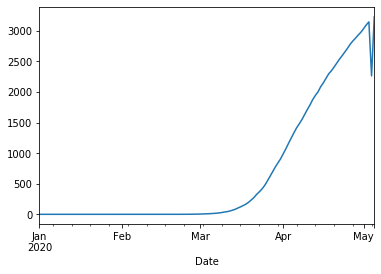

In [381]:
colder_country_cases.set_index('Date')['Mean_Cases_Cold'].plot()

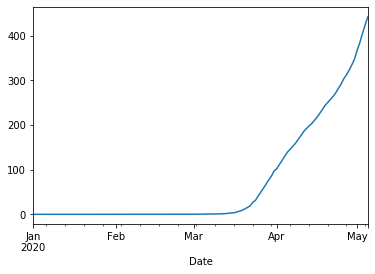

In [382]:
warmer_country_cases.set_index('Date')['Mean_Cases_Hot'].plot()

In [405]:
#hot_cold_mean_merged.plot(kind='line',x='state',y='deaths Per Capita',ax=ax)

hot_cold_mean_merged = cases_perweek_warm[['Mean_Cases_Hot']]
hot_cold_mean_merged['Mean_Cases_Cold'] = cases_perweek_cold[['Mean_Cases_Cold']]
#hot_cold_mean_merged['Week'] = cases_perweek_warm[['Date']]
hot_cold_mean_merged['Week_No.'] = hot_cold_mean_merged.index
hot_cold_mean_merged

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Mean_Cases_Hot,Mean_Cases_Cold,Week_No.
Date,,,
1,0.000000,0.000000,1
2,0.000000,0.000000,2
3,0.000000,0.000000,3
4,0.005600,0.001429,4
5,0.050429,0.026571,5
6,0.099714,0.058114,6
7,0.113143,0.089086,7
8,0.134457,0.144914,8
9,0.201229,2.012971,9


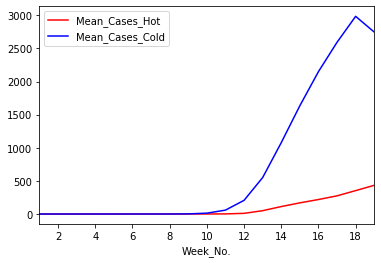

In [426]:
ax = plt.gca()

hot_cold_mean_merged.plot(kind='line',x='Week_No.',y='Mean_Cases_Hot',color='red', ax=ax)
hot_cold_mean_merged.plot(kind='line',x='Week_No.',y='Mean_Cases_Cold', color='blue', ax=ax)
    
plt.show()

### Observations:
#### The correlation between the spread of virus and temperature is not limited to the United States locally but it is also a global phenomenon as observed from the plot and our findings.